In [2]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

# Métodos Numéricos: Necessidade, Evolução e Profissão

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Diferenciar soluções exatas de soluções aproximadas e reconhecer situações em que métodos analíticos não são aplicáveis;</li>
	    <li>Investigar a evolução dos métodos numéricos e da computação de alto desempenho, bem como seu impacto na atualidade;</li>
	    <li>Relacionar perfis e competências necessárias em métodos numéricos, justificando a importância das habilidades de programação.</li>	    
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> "Já é uma grande e necessária prova de inteligência ou discernimento saber 
        o que se deve perguntar de forma razoável. Pois, se a pergunta é absurda em si mesma
        e exige respostas desnecessárias, então, além do constrangimento de quem a propõe, 
        ela ainda tem a desvantagem de levar o ouvinte desatento a dar respostas igualmente absurdas (...)"
        (Immanuel Kant, Crítica da Razão Pura, 1781) 
        </p></em>
    </div>        
</div>

Inicialmente, reflita um pouco sobre essas indagações:

- Há solução para todos os problemas?
- Há solução para todos os problemas que podem ser formulados matematicamente?
- Há pelo menos uma solução para cada problema que pode ser formulado matematicamente? 
- Há, exatamente, uma única solução para um dado problema formulado matematicamente?


A constatação de que nem todo problema formulável possui uma solução clara, única ou mesmo existente dentro de um sistema lógico fechado — como demonstram os [Teoremas da Incompletude de Gödel](https://pt.wikipedia.org/wiki/Teoremas_da_incompletude_de_Gödel) — nos obriga a repensar a própria natureza da resolução de problemas em ciências computacionais e engenharia. Em muitos casos, não buscamos uma resposta definitiva no sentido clássico da lógica formal, mas sim uma aproximação suficientemente boa para guiar decisões, validar modelos ou viabilizar soluções técnicas. É nesse contexto de incerteza epistemológica e pragmatismo computacional que surgem os métodos numéricos como uma ponte entre o mundo idealizado da matemática e as limitações do mundo real.

A computação moderna, ao mesmo tempo que herda as restrições teóricas da matemática formal, oferece ferramentas para navegar na complexidade. Mesmo quando não se pode obter uma solução analítica exata — seja por limitações teóricas, como nos casos em que não se pode isolar uma variável, ou por limitações práticas, como equações diferenciais sem solução fechada — os métodos numéricos oferecem estratégias para aproximar soluções com controle de erro. Esses métodos reconhecem que, em engenharia, uma resposta "boa o bastante" dentro de certos limites de precisão pode ter mais valor do que uma prova formal da existência ou unicidade da solução.

Portanto, tanto as limitações lógicas do conhecimento formal quanto a necessidade concreta de resolver problemas complexos confluem para os métodos numéricos. Eles nos permitem avançar onde a análise pura falha, e nos capacitam a transformar modelos matemáticos em algoritmos executáveis.

## Soluções exatas vs. soluções aproximadas

Soluções exatas são obtidas por expressões "fechadas", isto é, fórmulas analíticas que resolvem completamente o problema dentro do próprio sistema matemático. Já as soluções aproximadas surgem de abordagens "abertas", iterativas e numéricas, que produzem respostas com erro controlado, mas sem uma forma explícita final. Enquanto as soluções fechadas buscam exatidão formal, as abertas priorizam viabilidade prática, especialmente diante da complexidade e não linearidade dos problemas reais. A existência de soluções por fórmulas analíticas para modelos matemáticos que conhecemos é limitadíssima e, é um dos motivos porque necessitamos de métodos numéricos.

Vejamos alguns casos em que há soluções exatas (fechadas) conhecidas para o modelo matemático subjacente.

### A fórmula de Bhaskara

Todos sabemos que os casos abaixo, admitidos para o discriminante $\Delta$, decorrem da famosa fórmula de Bhaskara:

- $ \Delta < 0 \Rightarrow $ nenhuma raiz real; 
- $ \Delta = 0 \Rightarrow $ duas raízes reais iguais $ \{x_1 = x_2 = x \} $; 
- $ \Delta > 0 \Rightarrow $ duas raízes reais distintas $ \{x_1,x_2 \} $ ;

A fórmula $x = -b \pm \frac{ \sqrt{b^2 - 4ac} }{2a}$ é justamente uma **solução fechada** para resolver qualquer problema da forma $f(x) = 0$, quando 

$$
f(x) = a_0 + a_1x + a_2x^2, \ \ \forall x \in A \subset \mathbb{R}
$$
e coeficientes reais.


```{admonition} Curiosidade: A fórmula de Po-Shen-Lo
:class: dropdown

Ancorado nas ideias dos gregos, babilônicos e Viète, um professor de matemática da _Carnegie Mellon University_ apresentou uma abordagem alternativa para resolver equações quadráticas que evita necessidade de memorização: [a fórmula de Po-Shen-Lo](http://poshenloh.com).
```

### A fórmula de Hagen-Poiseuille

Um exemplo um pouco mais elaborado é o caso da equação de [Hagen-Poiseuille](https://en.wikipedia.org/wiki/Hagen–Poiseuille_equation) que determina a velocidade axial de um fluido escoando em um tubo, desde que alguns parâmetros sejam fornecidos e hipóteses satisfeitas, tais como permanência, axissimetria e pleno desenvolvimento. A equação pode ser descrita por:

$$
u(r) = - \dfrac{1}{4 \mu} G (R^2 - r^2),
$$

onde $u$ é a velocidade axial, $r$ é a coordenada radial, $\mu$ é a viscosidade do fluido, $G = \frac{dp}{dx}$ é o gradiente de pressão $p$ (assumido constante) ao longo da  coordenada axial $x$ e $R$ é o raio do tubo. 

Essa equação funciona como uma **solução fechada** e serve como referência para cálculos.

### Casos sem solução exata

Podemos dar dois exemplos simples para os quais não há solução exata (analítica):

- A equação

$$
\cos(\theta) = \theta \Rightarrow f(\theta) = \cos(\theta) - \theta
$$

não admite uma fórmula direta que nos permita encontrar o(s) ângulo(s) $\theta^{*}$ para o(s) qual(is) $f(\theta^{*}) = 0$.

- A integral

$$
V(T) = \int_{0}^{T} \frac{1000}{ \sqrt{ 1 + t + 0.01t^3  } } \, dt,
$$

que descreve o volume vazado de óleo $V$ durante um intervalo de tempo $T$ não é resolvida por antiderivadas elementares.


São situações como esses que exigem o uso de métodos numéricos.

### Motivação

No {numref}`Caderno %s <cap:modelagem>`, apresentamos a seguinte equação

$$
v(t) = \dfrac{mg}{c} \left(1 - e^{-\dfrac{c}{m}t}\right),
$$


onde $m$ é a massa de um paraquedista, $g$ a aceleração da gravidade, $c$ o coeficiente de arrasto no local de salto, $t$ o tempo e $v$ a velocidade. 

É fácil ver que se forem conhecidos os valores de $g$, $m$, $c$ e $t$, conseguimos determinar o valor da velocidade do salto em um instante específico. Genericamente, para um intervalo de tempo, conseguiremos descobrir o perfil de $v$. 

O código abaixo nos ajuda a analisar graficamente alterações do perfil de $v(t)$ ao variarmos o coeficiente de arrasto, por exemplo.

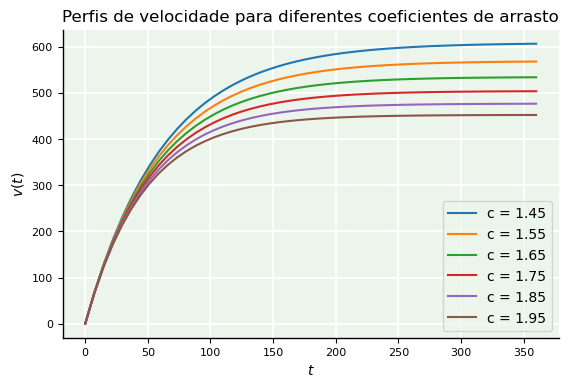

In [12]:
from numpy import linspace, arange, exp
import matplotlib.pyplot as plt

t = linspace(0,360) # intervalo de tempo
g = 9.8 # gravidade
m = 90 # massa
c = arange(1.45,2,0.1) # coef. arrasto

# plotagem
for ci in c:
	v = g*m/ci*(1 - exp(- ci/m*t))
	plt.plot(t,v, label=f'c = {ci:.2f}')

plt.legend()
plt.xlabel('$t$')
plt.ylabel('$v(t)$')
plt.title('Perfis de velocidade para diferentes coeficientes de arrasto');

Por outro lado, e se a questão for: 

> Como determinar o coeficiente de arrasto $c$ para que um paraquedista de dada massa $m$ atinja um valor prescrito para $v$ exatamente no instante $t$?

Seria possível isolar $c$ a partir da expressão de $v(t)$ a fim de obter seu valor se os demais parâmetros fossem todos prescritos? Tente descobrir. 

Métodos numéricos nos ajudam a responder perguntas desse tipo, como veremos ao longo deste _ebook_. 

### Definição

Antes de fazer uma breve retrospectiva sobre a evolução dos métodos numéricos para compreender em que ponto da história estamos, é adequado trazer alguma definição para eles. De maneira simples, podemos dizer que: 

> Método numérico é uma técnica computacional que usa operações aritméticas para resolver, de forma aproximada, problemas formulados matematicamente cujas soluções analíticas são desconhecidas.

## Evolução histórica dos métodos numéricos e da computação de alto desempenho

Alguns métodos que usamos até hoje têm origem no período babilônico antigo. Entretanto, no século XVII houve um enorme salto no aspecto analítico. O método de Newton-Raphson, que iremos estudar mais tarde, por exemplo, remonta a 1669 e foi aperfeiçoado como método iterativo por volta de 1740. Métodos para calcular derivadas surgiram com Euler, por volta de 1768, mas foram estendidos para dimensões superiores apenas no início do século XX. Após o advento das ideias de Alan Turing e de sua [_máquina universal_](https://pt.wikipedia.org/wiki/Máquina_de_Turing), a era do computador digital emergiu.

Depois da invenção do [ENIAC](https://en.wikipedia.org/wiki/ENIAC), em 1945, o primeiro computador digital programável do mundo a capacidade computacional aumentou vertiginosamente. Para se ter ideia, um dos primeiros trabalhos formais que analisaram o custo computacional de inverter matrizes, autorado por Jonh Von Neumann e H. H. Goldstine, apareceu em [1947](https://www.ams.org/journals/bull/1947-53-11/S0002-9904-1947-08909-6/S0002-9904-1947-08909-6.pdf). Naquela época, discutia-se que matrizes quadradas da ordem de 15, 50, 150 poderiam ser invertidas com precisão de 8, 10, 12 dígitos, já que elas compunham o que se chamava de "sistema de grande porte". Hoje, esse "grande porte" despertaria alguns risos pelos especialistas da área. 

O primeiro supercomputador foi criado na década de 1960, o [CDC 6600](https://pt.wikipedia.org/wiki/CDC_6600), oferencendo um _clock_ de 100 nanosegundos, o mais veloz então conhecido. Dos mesmos criadores deste, nasce o [Cray-1](https://en.wikipedia.org/wiki/Cray-1), em 1976, com capacidade de 160 MFLOPS e já operando com arquitetura de 64 bits. Instalado no conhecido [Los Alamos National Laboratory](https://en.wikipedia.org/wiki/Los_Alamos_National_Laboratory), quatro anos depois de a Intel lançar seu primeiro microprocessador de apenas 4 bits, o [Intel 4004](https://pt.wikipedia.org/wiki/Intel_4004), ele foi densamente usado para acelerar a pesquisa científica sobre reações nucleares, já que o mundo vivia o auge da Guerra Fria. Foi na década de 1970 também que começaram a se popularizar métodos numéricos para resolução de equações diferenciais parciais, como o [método dos elementos finitos](https://en.wikipedia.org/wiki/Finite_element_method), que ganhou projeção na engenharia civil.

Até meados de 1990, supercomputadores dotados de processadores vetoriais dominaram o espaço digital. Em vez de realizar uma operação por vez (como um processador escalar tradicional), um processador vetorial permitia a mesma operação a vários elementos de dados simultaneamente, de forma altamente eficiente. Por essa razão, supercomputadores com essa tecnologia, como os da família Cray (Cray-1, Cray-2, Cray X) tornaram-se especialmente eficazes para tarefas científicas e de engenharia que envolviam grandes volumes de cálculos numéricos repetitivos, como multiplicações de matrizes, transformadas de Fourier ou simulações físicas. 

Na década de 2000, uma nova era de supercomputadores surgiu com as arquiteturas massivamente paralelas abrindo caminho para tecnologias distribuiídas. Na vanguarda desse desenvolvimento estava a IBM, que investiu 100 milhões de dólares na construção da plataforma [Blue Gene](https://en.wikipedia.org/wiki/IBM_Blue_Gene), que esteve por várias vezes no topo da lista TOP500, que lista os 500 supercomputadores mais poderosos do mundo. A última edição da lista, publicada em novembro de 2024 apontava o [El Capitan](https://www.youtube.com/watch?v=Q8wtuk3XPWM) como o computador mais rápido do mundo, com capacidade de operação de 2.79 exaFLOPS!

Depois do rompimento da ordem de exaFLOPS (quintilhão de operações por segundo), os métodos numéricos entraram em uma nova geração, sendo necessária a compreensão mínima de seus fundamentos e de conhecimentos básicos de programação. Sem os quais, será impossível aproveitar o que os novos paradigmas de computação têm a oferecer, como sistemas baseados em GPUs (unidade de processamento gráfico, do inglês _Graphics Processing Unit_) e FPGAs (array de porta programável em campo, do inglês _Field-Programmable Gate Array_). Linguagens como [CUDA](https://pt.wikipedia.org/wiki/CUDA) e [OpenCL](https://pt.wikipedia.org/wiki/OpenCL) têm sido primordiais para implementações paralelas e farão parte do futuro da computação científica e dos métodos numéricos.


### Computação de alto desempenho

A Computação de Alto Desempenho (HPC, do inglês _High Performance Computing_) refere-se ao uso de supercomputadores e arquiteturas paralelas para resolver problemas computacionalmente intensivos, que seriam inviáveis ou extremamente lentos em computadores convencionais. Seu foco está na execução simultânea de milhões ou bilhões de operações por segundo, utilizando centenas ou milhares de núcleos de processamento, geralmente distribuídos em clusters interconectados. A HPC combina conhecimento em hardware (como CPUs, GPUs e redes de alta velocidade) com software otimizado (bibliotecas paralelas, escalabilidade, balanceamento de carga e algoritmos eficientes) para maximizar desempenho.

Os temas envolvidos em HPC incluem paralelismo (explícito e implícito), programação distribuída (com `MPI`, `OpenMP`, `CUDA` etc.), escalabilidade de algoritmos, gerenciamento de recursos, e otimização de desempenho. Essas técnicas são aplicadas em diversas áreas do conhecimento e da indústria, como simulações climáticas, engenharia computacional, bioinformática, astrofísica, inteligência artificial, finanças quantitativas e projetos aeroespaciais. A HPC viabiliza experimentos numéricos em larga escala, acelera processos de inovação e permite avanços científicos e tecnológicos que dependem de enorme poder computacional.


``````{admonition} Curiosidade: Stargate: o projeto bilionário para o futuro da IA
:class: dropdown

Anunciado em janeiro de 2025, o Projeto [Stargate](https://en.wikipedia.org/wiki/Stargate_LLC) é uma iniciativa de escala monumental que tem o objetivo desenvolver uma  inteligência artificial (IA) avançada. Com investimento planejado de [US$ 500 bilhões até 2029](https://www.datacenterdynamics.com/en/news/openai-announces-the-stargate-project-500bn-over-four-years-on-ai-infrastructure/), o projeto visa construir uma infraestrutura de IA robusta, incluindo data centers de última geração, chips especializados e sistemas de energia sustentáveis. A _joint-venture_, encabeçada por uma coalização de grandes empresas, tais como OpenAI, SoftBank, Oracle, MGX, Microsoft, NVIDIA e Arm, está [construindo](https://www.youtube.com/watch?v=GhIJs4zbH0o) sua infraestrutura na cidade de Abilene, localizada no estado americano do Texas. O Stargate visa moldar completamente o futuro da IA, revolucionando a medicina, a indústria, a segurança cibernética e a economia. Em maio de 2025, os Emirados Árabes Unidos anunciou uma parceria com os EUA para construir a [Stargate UAE](https://m.koreaherald.com/article/10493730).
```

#### FLOPS

O termo _FLOPS_ (do inglês _Floating Point Operations Per Second_) é uma medida de desempenho de supercomputadores que indica quantas operações de ponto flutuante – conceito expandido no próximo capítulo – um processador ou sistema consegue executar em um segundo. Essa métrica é especialmente importante para a simulações científicas, modelagem numérica e inteligência artificial, que dependem de exigem alto poder de cálculo. Como os números envolvidos podem ser muito grandes, utiliza-se com frequência prefixos do Sistema Internacional para facilitar a leitura ({numref}`Tabela %s <tbl-flops>`).

```{table} Unidades e valores numéricos correspondentes para FLOPS.
:name: tbl-flops

| Nome         | Unidade    | Valor numérico   | 
|:-------------|------------|-----------------:|
| kiloFLOPS    | kFLOPS     | $10^{3}$         |
| megaFLOPS    | MFLOPS     | $10^{6}$         |
| gigaFLOPS    | GFLOPS     | $10^{9}$         |
| teraFLOPS    | TFLOPS     | $10^{12}$        |
| petaFLOPS    | PFLOPS     | $10^{15}$        |
| exaFLOPS     | EFLOPS     | $10^{18}$        |
```

## Razões para estudar métodos numéricos na era digital

Como temos visto, métodos numéricos estão entremeados em diversos campos de interesse. Além do que já expusemos, há outros motivos para empreender uma jornada de aprendizado em métodos numéricos. Entre eles, podemos citar:

- _Ampliação das ferramentas de resolução_: permite lidar com grandes sistemas de equações, problemas não lineares e geometrias complexas, difíceis de tratar por métodos analíticos tradicionais.

- _Superação das limitações de softwares comerciais_: muitos programas “pré-empacotados” são fechados e não oferecem flexibilidade para resolver problemas específicos, o que exige o uso de métodos numéricos personalizados.

- _Desenvolvimento de software para nichos específicos_: capacita a criação de soluções científicas e de engenharia sob medida, promovendo inovação tecnológica em áreas especializadas.

Além disso, esses motivos ganham ainda mais relevância diante da atual transição de paradigmas na computação e engenharia, onde o domínio de métodos numéricos se torna uma competência estratégica para enfrentar desafios modernos da era datificada, onde o regime do _big data_ tende a predominar em muitos setores.


```{admonition} Curiosidade: É possível inovar com métodos numéricos?
:class: dropdown

Muitos centros de pesquisa mundo afora não apenas fazem pesquisa básica, mas também impulsionam a inovação em métodos numéricos e mantêm uma forte relação com a criação de startups e empresas que aplicam esses avanços para resolver problemas complexos em várias áreas da ciência, engenharia e computação. Alguns exemplos são:

- _Institut National de Recherche en Sciences et Technologies du Numérique_ ([INRIA](https://www.inria.fr)). Ao longo dos anos, o instituto francês gerou cerca de 170 startups de tecnologia. O INRIA foi o principal apoiador do `scikit-learn`, a biblioteca Python mais popular para aprendizado de máquina que hoje possui mais de 1 milhão de usuários.

- _Berlin Mathematics Research Center_ ([MATH+](https://www.mathplus.de)). O centro é uma iniciativa alemã recente que integrou toda a tradição do Centro de Pesquisas [MATHEON](https://www.matheon.de). Desde 2002, o MATHEON transferiu conhecimento para diversas _spin offs_.

- _Centre Internacional de Mètodes Numèrics a l'Enginyeria_ ([CIMNE](https://www.cimne.com)). Este centro de pesquisa catalão é um dos mais reconhecidos do mundo em engenharia computacional além de possuir um histórico invejável de sucesso na geração de tecnologias.
```

### Regimes de dados

O conceito de regime de dados emergiu para tipificar a escala de dados com que uma organização ou sistema lida, impactando diretamente as técnicas e abordagens utilizadas para processá-los. Em um cenário tradicional, os dados são tratados em regimes pequenos, onde podem ser facilmente armazenados e processados por sistemas convencionais, utilizando ferramentas e bancos de dados tradicionais. No entanto, conforme o volume e a complexidade dos dados aumentam, os sistemas precisam ser ajustados para lidar com regimes maiores. Atualmente, são 3 os principais termos usados para definir o regime de dados no contexto da engenharia computacional ({numref}`fig-dataRegime`):

- _Small data_: quando existem pouquíssimos dados sobre os fenômenos físicos fundamentais. Neste regime, métodos clássicos são mais intensos do que aqueles guiados por dados.
- _Middle data_: quando existe conhecimento suficiente dos fenômenos físicos subjacentes a ponto de ser possível treinar modelos de dados para a tomada decisão. Neste regime, há uma quantidade razoável de dados explicativos, sendo necessária menos intervenção de métodos clássicos.
- _Big data_: quando existe vasto conhecimento sobre os fenômenos subjacentes. Neste regime, é possível obter sucesso com métodos guiados puramente por dados.

Existem diversas áreas em que o _big data_ é uma realidade, como o e-commerce e o marketing digital, onde é possível, por exemplo, desenvolver sistemas de recomendação a partir do volume de dados circulados sobre clientes. O _middle data_ ocorre em algumas áreas da saúde, por exemplo, onde se conhece com algum grau explicativo uma doença, ou reações desencadeadas por compostos químicos. Na área de petróleo e gás, predomina o _small data_ principalmente em áreas geológicas não exploradas, onde são necessários estudos sísmicos detalhados para mapear o local.


```{figure} ../figs/data-regime.png
---
width: 350px
name: fig-dataRegime
---
Visão holística dos regimes de dados em engenharia computacional: fatias de participação, áreas de competência e características.
```


## Vertentes profissionais

Neste _ebook_, compreendemos que o caminho dos métodos numéricos pende para duas vertentes principais:

- _Análise numérica_. A análise numérica gera profissionais com inclinação acentuada para a matemática. Um analista numéricO estará voltado para o estudo teórico e prático de algoritmos usados para resolver problemas contínuos e discretos. Seu foco está em entender profundamente a convergência, estabilidade, consistência e propagação de erros nos métodos, muitas vezes com suporte de teoremas matemáticos que garantem a validade e a eficiência das técnicas numéricas. Este perfil é essencial em contextos onde se exige uma justificativa rigorosa da confiabilidade dos métodos aplicados — como em modelagens físicas críticas, validações de simulações ou em desenvolvimento de novos algoritmos para problemas mal-condicionados.

- _Engenharia computacional_. Sendo interdisciplinar e focada em aplicações, essa área gera profissionais com ênfase em desenvolvimento de software científico, implementação eficiente de algoritmos e integração de métodos numéricos em sistemas computacionais complexos. Embora possua uma base matemática sólida, um engenheiro computacional atua fortemente com estruturas de dados, fluxo de controle, paralelismo, e otimização de desempenho, frequentemente lidando com linguagens de programação como Python, C++ e Julia, além de ferramentas modernas como CUDA, MPI, e bibliotecas numéricas (`NumPy`, `SciPy`, `PETSc`, etc). Seu diferencial está na capacidade de transformar teoria em soluções práticas, eficientes e escaláveis.

Ambas as vertentes são relevantes e complementares, mas a segunda tende a se adaptar melhor ao currículo oferecido às formações para as quais este _ebook_ está direcionado. Por este motivo, não se verá no conteúdo posterior discussões extensas sobre os aspectos teóricos dos métodos numéricos.

```{figure} ../figs/profiles-ai.png
---
width: 250px
name: fig-profile
```